In [4]:
from grid_world import *
from q_learning import *
import random
from math import exp

# Parameters we will use to create the Grid World (we can make more complex worlds!!)
BOARD_ROWS = 3
BOARD_COLS = 4
WIN_STATE = (0, 3)
LOSE_STATE = [(1, 3)]
OBSTACLES = [(1,1)]
START = (2, 0)
DETERMINISTIC = True


# Learning model parameters
ALPHA = 0.05
GAMMA = 0.5

# Exploration
MAX_EPSILON = 0.5
MIN_EPSILON = 0.005

In [5]:
# Create the environment

# Trying to simulate the api used in OpenAI Gym
env = GridWorld(BOARD_ROWS, BOARD_COLS, WIN_STATE, LOSE_STATE, OBSTACLES, START, DETERMINISTIC)
# Instance of the QLearning model
qlearn = QLearn(ALPHA, GAMMA, env.action_space)


# Exploration vs Exploitation
EPSILON = MAX_EPSILON
# Data about the rounds
steps_taken = []
success = []
# Make N_EPISODES rounds of the game
N_EPISODES = 1000
for i in range(N_EPISODES): 
    finished = False
    state = env.state
    while not finished:
        # Register old state, to later use to update q-values
        old_state = state
        # Predict an action with our model (or randomize one, to explore the environment)
        if random.uniform(0,1) < EPSILON:
            action = env.action_space[random.randint(0,3)]
        else:
            action = qlearn.action(env.state)
        # Make th move in the environment
        state, reward, finished, steps = env.step(action)

        # Update Q-values
        qlearn.updateQValues(old_state, action, reward, state)
        # Update epsilon (so the exploitation grows)
        # We can do this in whatever way we want, i'll base the variation on the sigmoid function
        # The try/catch is because of the overflow caused by the massive values produced by the exp function
        # Gotta find a more elegant way to do this in the future :D
        try:
            EPSILON = MIN_EPSILON + (MAX_EPSILON - MIN_EPSILON) * (1/(1 + exp(N_EPISODES/2-i)))
        except:
            if N_EPISODES/2-i > 0:
                EPSILON = MAX_EPSILON
            else:
                EPSILON = MIN_EPSILON
    steps_taken.append(steps)
    success.append(state == WIN_STATE) 
    env.reset()




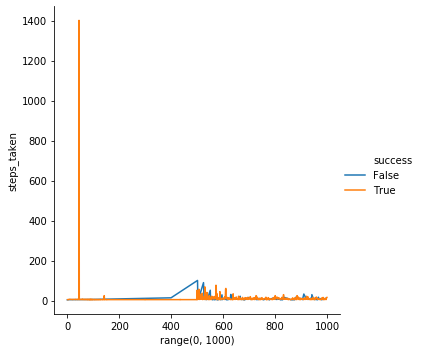

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

dict = {'steps_taken': steps_taken, 'success': success}

data = pd.DataFrame(dict)

plot = sns.relplot(x=range(N_EPISODES), data=data, y='steps_taken', hue='success', kind="line")
plt.show()